# Using Pandas to process a dataset
Data from USDA:<br />
https://www.ers.usda.gov/data-products/agricultural-productivity-in-the-u-s/agricultural-productivity-in-the-u-s/#CSV%20Format%20of%20National%20Data<br />
Values normalized to 2015 value (2015 = 1)

In [1]:
import numpy as np
import pandas as pd

In [15]:
# Read csv
df = pd.read_csv("usda_farm_indices.csv")
df.head(10)

,Year,Attribute,Value
0,1948,Total agricultural output,0.362833
1,1948,Livestock and products output: Total 1/,0.437903
2,1948,Livestock and products output: Meat animals,0.562957
3,1948,Livestock and products output: Dairy,0.448529
4,1948,Livestock and products output: Poultry and eggs,0.129304
5,1948,Crops output: Total,0.338529
6,1948,Crops output: Food grains,0.524309
7,1948,Crops output: Feed crops,0.392067
8,1948,Crops output: Oil crops,0.110668
9,1948,Crops output: Vegetables and melons,0.397223


In [16]:
# Summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       2130 non-null   int64  
 1   Attribute  2130 non-null   object 
 2   Value      2130 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 50.1+ KB


In [17]:
# Get unique years
df["Year"].unique()

array([1948, 1949, 1950, 1951, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [21]:
# Get unique attributes
df["Attribute"].unique()

array(['Total agricultural output',
       'Livestock and products output: Total',
       'Livestock and products output: Meat animals',
       'Livestock and products output: Dairy',
       'Livestock and products output: Poultry and eggs',
       'Crops output: Total', 'Crops output: Food grains',
       'Crops output: Feed crops', 'Crops output: Oil crops',
       'Crops output: Vegetables and melons',
       'Crops output: Fruits and nuts', 'Crops output: Other crops',
       'Farm-related output', 'Farm inputs: Total',
       'Capital inputs: Total', 'Capital inputs: Durable equipment',
       'Capital inputs: Service buildings', 'Capital inputs: Land',
       'Capital inputs: Inventories', 'Labor inputs: Total',
       'Labor inputs: Hired labor',
       'Labor inputs: Self-employed and unpaid family',
       'Intermediate inputs: Total', 'Intermediate inputs: Feed and seed',
       'Intermediate inputs: Energy',
       'Intermediate inputs: Fertilizer and lime',
       'Intermed

In [24]:
# Remove numbers, slashes, and whitespace
# df["Attribute"] = [attribute.replace("1/", "").replace("2/", "").replace("3/", "").strip() for attribute in df["Attribute"]]
df["Attribute"] = df["Attribute"].str.replace(r"[123]/", "", regex=True).str.strip()

# Store unique values
attributes = df["Attribute"].unique()
attributes

array(['Total agricultural output',
       'Livestock and products output: Total',
       'Livestock and products output: Meat animals',
       'Livestock and products output: Dairy',
       'Livestock and products output: Poultry and eggs',
       'Crops output: Total', 'Crops output: Food grains',
       'Crops output: Feed crops', 'Crops output: Oil crops',
       'Crops output: Vegetables and melons',
       'Crops output: Fruits and nuts', 'Crops output: Other crops',
       'Farm-related output', 'Farm inputs: Total',
       'Capital inputs: Total', 'Capital inputs: Durable equipment',
       'Capital inputs: Service buildings', 'Capital inputs: Land',
       'Capital inputs: Inventories', 'Labor inputs: Total',
       'Labor inputs: Hired labor',
       'Labor inputs: Self-employed and unpaid family',
       'Intermediate inputs: Total', 'Intermediate inputs: Feed and seed',
       'Intermediate inputs: Energy',
       'Intermediate inputs: Fertilizer and lime',
       'Intermed

In [22]:
# Using logic with series returns a Boolean series
df["Attribute"] == attributes[0]

0        True
1       False
2       False
3       False
4       False
        ...  
2125    False
2126    False
2127    False
2128    False
2129    False
Name: Attribute, Length: 2130, dtype: bool

In [23]:
# Passing that logic to the df returns only rows where True
df[df["Attribute"] == attributes[0]].head()

,Year,Attribute,Value
0,1948,Total agricultural output,0.362833
30,1949,Total agricultural output,0.357259
60,1950,Total agricultural output,0.348639
90,1951,Total agricultural output,0.364145
120,1953,Total agricultural output,0.380998


In [29]:
# Pivot creates columns from values in a column. Make columns for each attribute
pivot_df = df.pivot(index="Year", columns="Attribute", values="Value")
pivot_df

Attribute,Capital inputs: Durable equipment,Capital inputs: Inventories,Capital inputs: Land,Capital inputs: Service buildings,Capital inputs: Total,Crops output: Feed crops,Crops output: Food grains,Crops output: Fruits and nuts,Crops output: Oil crops,Crops output: Other crops,...,Intermediate inputs: Total,Labor inputs: Hired labor,Labor inputs: Self-employed and unpaid family,Labor inputs: Total,Livestock and products output: Dairy,Livestock and products output: Meat animals,Livestock and products output: Poultry and eggs,Livestock and products output: Total,Total agricultural output,Total factor productivity (TFP)
Year,,,,,,,,,,,,,,,,,,,,,
1948,0.467550,0.692027,1.369041,0.886676,1.120363,0.392067,0.524309,0.310912,0.110668,0.409471,...,0.431257,2.999098,4.570501,3.974612,0.448529,0.562957,0.129304,0.437903,0.362833,0.383332
1949,0.551742,0.748731,1.373723,0.925152,1.140866,0.360510,0.450339,0.275063,0.105840,0.450250,...,0.445904,2.786415,4.546308,3.878824,0.468620,0.582993,0.148074,0.440938,0.357259,0.372391
1950,0.636630,0.738851,1.376958,0.955876,1.169548,0.369673,0.419780,0.273999,0.107492,0.347430,...,0.454706,2.904928,4.236456,3.731842,0.472827,0.597969,0.158971,0.448577,0.348639,0.361446
1951,0.710515,0.756921,1.378356,0.983986,1.192800,0.357164,0.414267,0.299867,0.112389,0.450895,...,0.475389,2.804684,4.066649,3.588449,0.465135,0.630788,0.170449,0.466605,0.364145,0.371730
1953,0.806329,0.820665,1.374288,1.035700,1.221481,0.368851,0.488033,0.303515,0.113453,0.465445,...,0.481813,2.662123,3.789422,3.362526,0.500524,0.659016,0.178877,0.489349,0.380998,0.389327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016,0.999182,1.016978,1.010290,0.990991,1.005510,1.065863,1.128115,0.989843,1.082993,1.056593,...,0.978174,1.051175,0.990508,1.013160,1.014423,1.052079,1.019666,1.056603,1.030058,1.039679
2017,0.979480,1.001931,0.990254,0.978831,0.986758,1.020404,0.860430,0.931141,1.125213,1.091991,...,0.983741,1.016105,0.929956,0.962226,1.028846,1.096645,1.044365,1.055334,1.023858,1.044425


<Axes: xlabel='Year'>

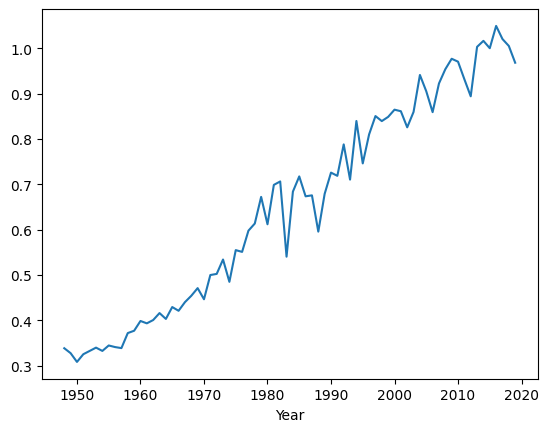

In [30]:
# We can plot directly from df
#pivot_df["Total agricultural output"].plot()
pivot_df["Crops output: Total"].plot()

In [31]:
# Use loc to isolate specific index values
pivot_df.loc[1950:1959] # Inclusive

Attribute,Capital inputs: Durable equipment,Capital inputs: Inventories,Capital inputs: Land,Capital inputs: Service buildings,Capital inputs: Total,Crops output: Feed crops,Crops output: Food grains,Crops output: Fruits and nuts,Crops output: Oil crops,Crops output: Other crops,...,Intermediate inputs: Total,Labor inputs: Hired labor,Labor inputs: Self-employed and unpaid family,Labor inputs: Total,Livestock and products output: Dairy,Livestock and products output: Meat animals,Livestock and products output: Poultry and eggs,Livestock and products output: Total,Total agricultural output,Total factor productivity (TFP)
Year,,,,,,,,,,,,,,,,,,,,,
1950,0.636630,0.738851,1.376958,0.955876,1.169548,0.369673,0.419780,0.273999,0.107492,0.347430,...,0.454706,2.904928,4.236456,3.731842,0.472827,0.597969,0.158971,0.448577,0.348639,0.361446
1951,0.710515,0.756921,1.378356,0.983986,1.192800,0.357164,0.414267,0.299867,0.112389,0.450895,...,0.475389,2.804684,4.066649,3.588449,0.465135,0.630788,0.170449,0.466605,0.364145,0.371730
1953,0.806329,0.820665,1.374288,1.035700,1.221481,0.368851,0.488033,0.303515,0.113453,0.465445,...,0.481813,2.662123,3.789422,3.362526,0.500524,0.659016,0.178877,0.489349,0.380998,0.389327
1954,0.847383,0.803575,1.368018,1.058393,1.232198,0.381831,0.428479,0.316886,0.119310,0.425991,...,0.456726,2.509897,3.775568,3.295194,0.513048,0.685004,0.188597,0.503202,0.380785,0.399189
1955,0.862413,0.824431,1.357938,1.079194,1.234368,0.402359,0.404737,0.332644,0.138262,0.434091,...,0.496898,2.466678,3.683562,3.221859,0.520769,0.709062,0.185729,0.513095,0.391252,0.396711
1956,0.873080,0.836250,1.344321,1.096824,1.233537,0.396013,0.422993,0.327825,0.150385,0.409459,...,0.513229,2.252523,3.489978,3.019607,0.534774,0.698535,0.207169,0.525025,0.393600,0.399502
1957,0.860423,0.814399,1.328591,1.109968,1.220187,0.433224,0.400668,0.335504,0.145213,0.345656,...,0.529596,2.160936,3.189937,2.799912,0.539649,0.665830,0.211919,0.513434,0.389331,0.398013
1958,0.846848,0.840619,1.313282,1.121607,1.207423,0.457070,0.591336,0.315186,0.174290,0.362938,...,0.551163,2.176793,2.965910,2.669006,0.538813,0.676294,0.225070,0.518456,0.411026,0.418505
1959,0.850053,0.871198,1.301565,1.131774,1.203104,0.461834,0.472734,0.342110,0.159291,0.435320,...,0.585910,2.124607,2.969396,2.650625,0.537755,0.712665,0.233017,0.534951,0.422037,0.418540


In [32]:
# Use iloc to provide numerical indices, like slicing a list
pivot_df.iloc[2:11] # NOT inclusive

Attribute,Capital inputs: Durable equipment,Capital inputs: Inventories,Capital inputs: Land,Capital inputs: Service buildings,Capital inputs: Total,Crops output: Feed crops,Crops output: Food grains,Crops output: Fruits and nuts,Crops output: Oil crops,Crops output: Other crops,...,Intermediate inputs: Total,Labor inputs: Hired labor,Labor inputs: Self-employed and unpaid family,Labor inputs: Total,Livestock and products output: Dairy,Livestock and products output: Meat animals,Livestock and products output: Poultry and eggs,Livestock and products output: Total,Total agricultural output,Total factor productivity (TFP)
Year,,,,,,,,,,,,,,,,,,,,,
1950,0.636630,0.738851,1.376958,0.955876,1.169548,0.369673,0.419780,0.273999,0.107492,0.347430,...,0.454706,2.904928,4.236456,3.731842,0.472827,0.597969,0.158971,0.448577,0.348639,0.361446
1951,0.710515,0.756921,1.378356,0.983986,1.192800,0.357164,0.414267,0.299867,0.112389,0.450895,...,0.475389,2.804684,4.066649,3.588449,0.465135,0.630788,0.170449,0.466605,0.364145,0.371730
1953,0.806329,0.820665,1.374288,1.035700,1.221481,0.368851,0.488033,0.303515,0.113453,0.465445,...,0.481813,2.662123,3.789422,3.362526,0.500524,0.659016,0.178877,0.489349,0.380998,0.389327
1954,0.847383,0.803575,1.368018,1.058393,1.232198,0.381831,0.428479,0.316886,0.119310,0.425991,...,0.456726,2.509897,3.775568,3.295194,0.513048,0.685004,0.188597,0.503202,0.380785,0.399189
1955,0.862413,0.824431,1.357938,1.079194,1.234368,0.402359,0.404737,0.332644,0.138262,0.434091,...,0.496898,2.466678,3.683562,3.221859,0.520769,0.709062,0.185729,0.513095,0.391252,0.396711
1956,0.873080,0.836250,1.344321,1.096824,1.233537,0.396013,0.422993,0.327825,0.150385,0.409459,...,0.513229,2.252523,3.489978,3.019607,0.534774,0.698535,0.207169,0.525025,0.393600,0.399502
1957,0.860423,0.814399,1.328591,1.109968,1.220187,0.433224,0.400668,0.335504,0.145213,0.345656,...,0.529596,2.160936,3.189937,2.799912,0.539649,0.665830,0.211919,0.513434,0.389331,0.398013
1958,0.846848,0.840619,1.313282,1.121607,1.207423,0.457070,0.591336,0.315186,0.174290,0.362938,...,0.551163,2.176793,2.965910,2.669006,0.538813,0.676294,0.225070,0.518456,0.411026,0.418505
1959,0.850053,0.871198,1.301565,1.131774,1.203104,0.461834,0.472734,0.342110,0.159291,0.435320,...,0.585910,2.124607,2.969396,2.650625,0.537755,0.712665,0.233017,0.534951,0.422037,0.418540


In [ ]:
pivot_df.columns

Index(['Capital inputs: Durable equipment', 'Capital inputs: Inventories',
       'Capital inputs: Land', 'Capital inputs: Service buildings',
       'Capital inputs: Total', 'Crops output: Feed crops',
       'Crops output: Food grains', 'Crops output: Fruits and nuts',
       'Crops output: Oil crops', 'Crops output: Other crops',
       'Crops output: Total', 'Crops output: Vegetables and melons',
       'Farm inputs: Total', 'Farm-related output',
       'Intermediate inputs: Energy', 'Intermediate inputs: Feed and seed',
       'Intermediate inputs: Fertilizer and lime',
       'Intermediate inputs: Other intermediate',
       'Intermediate inputs: Pesticides',
       'Intermediate inputs: Purchased services', 'Intermediate inputs: Total',
       'Labor inputs: Hired labor',
       'Labor inputs: Self-employed and unpaid family', 'Labor inputs: Total',
       'Livestock and products output: Dairy',
       'Livestock and products output: Meat animals',
       'Livestock and product

In [42]:
# Get values from the 1950s from the columns with total in the header
totals = [col for col in pivot_df.columns if "Total" in col]
pivot_df.loc[1950:1959, totals]
# pivot_df.loc[[1950,1960,1970], totals]

Attribute,Capital inputs: Total,Crops output: Total,Farm inputs: Total,Intermediate inputs: Total,Labor inputs: Total,Livestock and products output: Total,Total agricultural output,Total factor productivity (TFP)
Year,,,,,,,,
1950,1.169548,0.308353,0.964567,0.454706,3.731842,0.448577,0.348639,0.361446
1951,1.192800,0.325324,0.979596,0.475389,3.588449,0.466605,0.364145,0.371730
1953,1.221481,0.339858,0.978607,0.481813,3.362526,0.489349,0.380998,0.389327
1954,1.232198,0.332601,0.953897,0.456726,3.295194,0.503202,0.380785,0.399189
1955,1.234368,0.344601,0.986239,0.496898,3.221859,0.513095,0.391252,0.396711
1956,1.233537,0.341104,0.985226,0.513229,3.019607,0.525025,0.393600,0.399502
1957,1.220187,0.338806,0.978187,0.529596,2.799912,0.513434,0.389331,0.398013
1958,1.207423,0.371955,0.982128,0.551163,2.669006,0.518456,0.411026,0.418505
1959,1.203104,0.377086,1.008353,0.585910,2.650625,0.534951,0.422037,0.418540


# DIDN'T GET TO THIS

In [35]:
# Get the mean for each column
pivot_df.loc[1950:1959, totals].mean()

Attribute
Capital inputs: Total                   1.212738
Crops output: Total                     0.342188
Farm inputs: Total                      0.979645
Intermediate inputs: Total              0.505048
Labor inputs: Total                     3.148780
Livestock and products output: Total    0.501410
Total agricultural output               0.386868
Total factor productivity (TFP)         0.394774
dtype: float64

In [36]:
# Standard deviation
pivot_df.loc[1950:1959, totals].std()

Attribute
Capital inputs: Total                   0.021780
Crops output: Total                     0.021357
Farm inputs: Total                      0.014994
Intermediate inputs: Total              0.044286
Labor inputs: Total                     0.390908
Livestock and products output: Total    0.028297
Total agricultural output               0.022193
Total factor productivity (TFP)         0.018893
dtype: float64

In [44]:
# Create a new df for each decade
decades = [i for i in pivot_df.index if i % 10 == 0]
print(decades)
decade_df = pd.DataFrame(pivot_df, index=decades, columns=totals)
decade_df
# pivot_df.loc[1950:1959, totals]

[1950, 1960, 1970, 1980, 1990, 2000, 2010]


,Capital inputs: Total,Crops output: Total,Farm inputs: Total,Intermediate inputs: Total,Labor inputs: Total,Livestock and products output: Total,Total agricultural output,Total factor productivity (TFP)
1950,1.169548,0.308353,0.964567,0.454706,3.731842,0.448577,0.348639,0.361446
1960,1.205453,0.398632,0.988211,0.577069,2.502950,0.534958,0.435613,0.440810
1970,1.224790,0.446494,0.985056,0.674503,1.759649,0.627554,0.494294,0.501793
1980,1.295233,0.611817,1.113094,0.867974,1.562436,0.676514,0.621427,0.558288
1990,1.048808,0.725726,0.957851,0.815657,1.212991,0.738521,0.727162,0.759160
2000,0.971550,0.864513,0.986813,0.943147,1.093185,0.883840,0.878561,0.890302
2010,0.966525,0.970356,0.943047,0.931557,0.937403,0.939346,0.958269,1.016140


In [45]:
# Get the mean for each decade using loc, and populate the new df also using loc
for decade in decades:
    decade_df.loc[decade] = pivot_df.loc[decade:decade + 9, totals].mean()

decade_df

,Capital inputs: Total,Crops output: Total,Farm inputs: Total,Intermediate inputs: Total,Labor inputs: Total,Livestock and products output: Total,Total agricultural output,Total factor productivity (TFP)
1950,1.212738,0.342188,0.979645,0.505048,3.148780,0.501410,0.386868,0.394774
1960,1.211986,0.422760,0.984600,0.614628,2.168969,0.581799,0.465463,0.472786
1970,1.236923,0.545703,1.010514,0.723079,1.673535,0.640707,0.561895,0.555585
1980,1.191247,0.658185,1.011523,0.791986,1.393283,0.699541,0.663139,0.658067
1990,1.005983,0.787659,0.973101,0.863992,1.213178,0.816475,0.795642,0.817308
2000,0.967948,0.896852,0.968672,0.938366,1.027057,0.914226,0.910918,0.940497
2010,0.980846,0.985753,0.968735,0.964619,0.962821,1.001100,0.997446,1.029866


<Axes: >

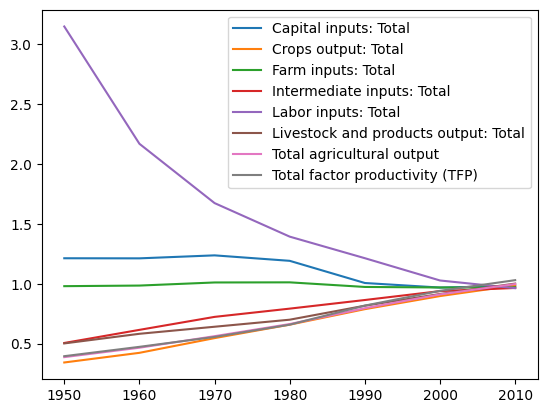

In [46]:
# Plot the whole df
decade_df.plot()